# Импортируем необходимые библиотеки

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Определение функции распределения

In [5]:
f = sts.genlogistic(10)

Функция распределения выглядит следующим образом:
$$f(x, c) = c \frac{\exp(-x)}{(1 + \exp(-x))^{c + 1}}$$

В нашем случае $c = 10$.
В интернете не получилось найти выражения для математического ожидания и дисперсии, поэтому давайте посчитаем численно для нашего случае математическое ожидание и дисперсию по явной формуле для любого распределения:
$$\mathbb{E}[X] = \int\limits_{-\infty}^{\infty}x c \frac{\exp(-x)}{(1 + \exp(-x))^{c + 1}}$$
$$D[X] = \mathbb{E}[X^2] - \left( \mathbb{E}[X]\right)^2$$

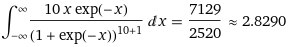

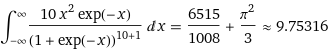

$$\mathbb{E}[X] = 2.8290, D[X] = 9.75316 - (2.8290)^2 = 1.749919$$

определяем математическое ожидание и дисперсию как переменные

In [13]:
mu = 2.8290
D = 1.749919

# Определение выборки объема 1000

In [6]:
prob = f.rvs(size = 1000) #введем выборку для нашей функции

In [7]:
x = np.linspace(0,10,1000)
y = f.pdf(x)

здесь представлен график плотности вероятности нашего распределения и гистограммы

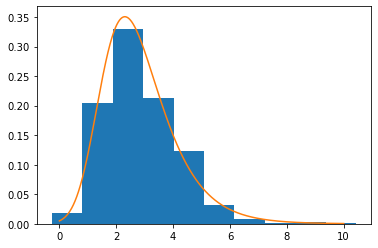

In [20]:
plt.hist(prob, density=True)
plt.plot(x, y)
plt.plot()
plt.show()

# Построение 1000 выборок объема n для n = 5, 15, 25, 35, ...

логика нижеприведенного кода предельно проста:
1. вводим вспомогательный массив
2. в цикле для n из набора из заголовка делаем 1000 выборок и для каждой выборки считаем выборочное среднее
3. далее вводим функцию, являющуюся нормальным распределением с параметрами: среднее значение, посчитанное теоретически, и квадратичным отклонением, получаемым из дисперсии, деленой на объем выборки, что следует из центральной предельной теоремы
4. далее строим наш график распределения и гистограмму на одном графике, для каждого графика написано, для какого n построен этот график

n = 5


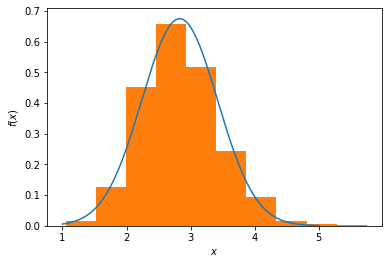

n = 15


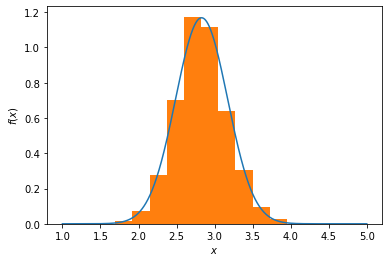

n = 25


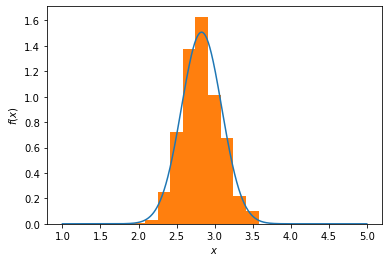

n = 35


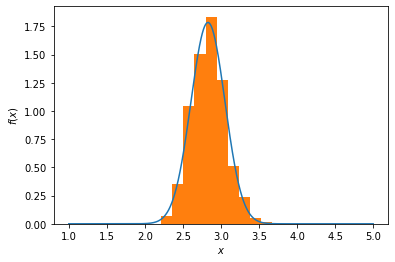

n = 45


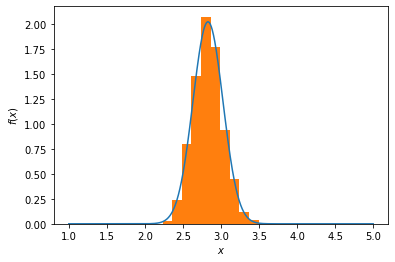

n = 55


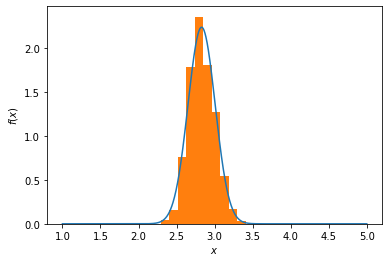

In [24]:
means = np.zeros(1000)
for n in range(5, 56, 10):
    for i in range(1000):
        means[i] = sum(f.rvs(size = n))/n
    print('n =',n)
    g = sts.norm(loc = mu, scale = np.sqrt(D/n))
    x_g = np.linspace(1, 5, 1000)
    y_g = g.pdf(x_g)
    plt.plot(x_g, y_g)
    plt.hist(means, density=True)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

# Итог

мы получили, что чем больше объем выборки, тем больше центральная предельная теорема работает и стягивает нормальное распределение к среднему